## Uber Rides Data Analysis Using Python

Importing Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset - [Link](https://drive.google.com/file/d/1XuZ6dwQqeccatMuu6veh5miFjhdWh9I0/view)

In [55]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


find out shape of data (rows and columns)

In [56]:
dataset.shape

(1156, 7)

More Information about Dataset

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


as evident from output there are many null values in this data (PURPOSE column) so we'll fill those places with some value

In [58]:
dataset.fillna({'PURPOSE': 'NOT'}, inplace=True)
# fill null values with 'NOT'

Convert the START_DATE and END_DATE to the datetime format to facilitate analysis and subsequent processing.

In [59]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], 
									errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], 
									errors='coerce')

Divide the START_DATE into separate columns for date and time. Then, categorize the time into four distinct periods: Morning, Afternoon, Evening, and Night.


In [60]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])


After creating the new columns, we can proceed to drop rows containing null values.

In [61]:
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)

# Data Visualization


Let's begin by examining the unique values within columns of the dataset that have an object datatype.

In [62]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = dataset[col].unique().size
unique_values


{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

Next, we'll utilize the Matplotlib and Seaborn libraries to create count plots for the CATEGORY and PURPOSE columns.

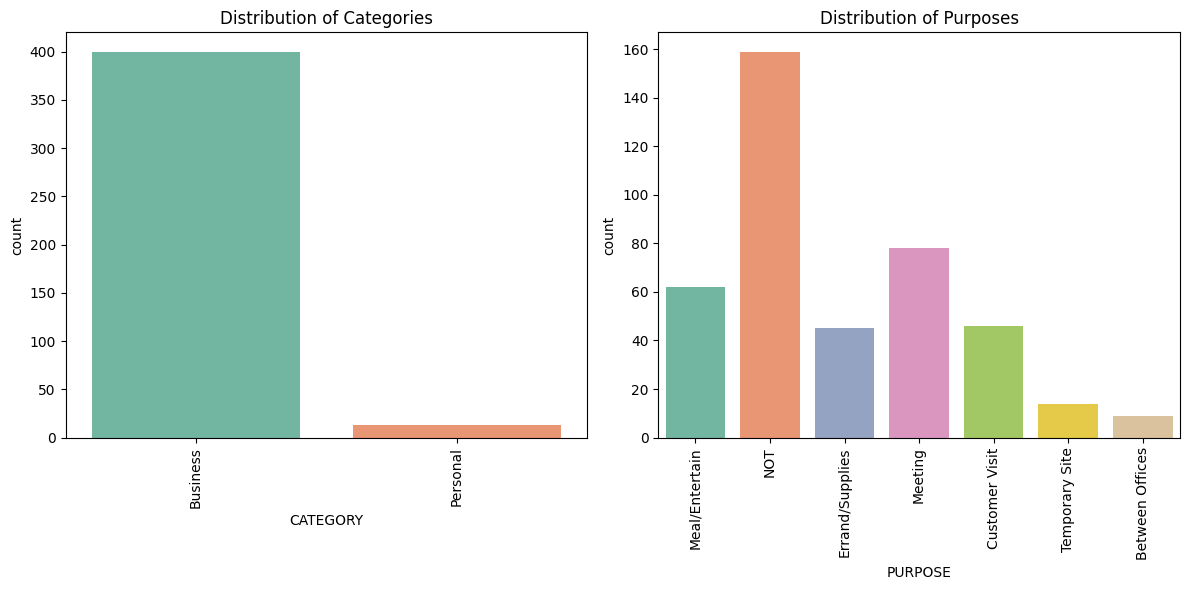

In [63]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x='CATEGORY', hue='CATEGORY', palette='Set2', legend=False)
plt.title('Distribution of Categories')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x='PURPOSE', hue='PURPOSE', palette='Set2', legend=False)
plt.title('Distribution of Purposes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


Let's create a count plot for the time column using the extracted time information.







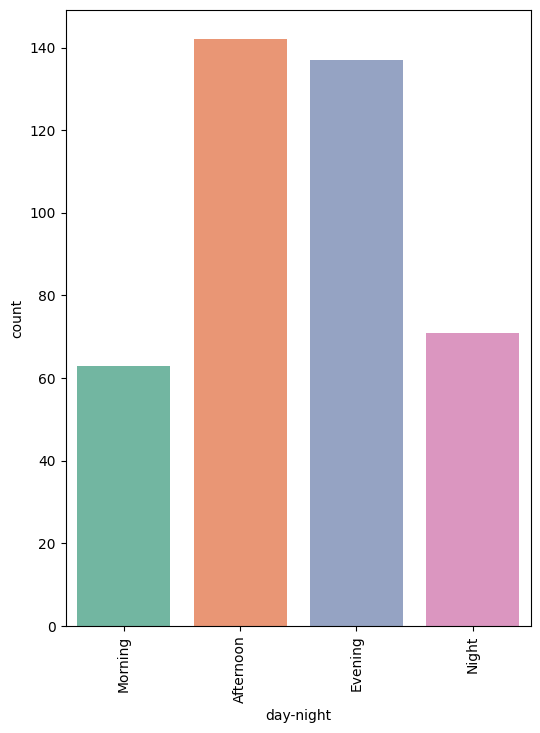

In [64]:
plt.figure(figsize=(6, 8))

sns.countplot(x='day-night', data=dataset, hue='day-night', palette='Set2', legend=False)
plt.xticks(rotation=90)

plt.show()


Next, we will compare the two different categories along with the user's PURPOSE.







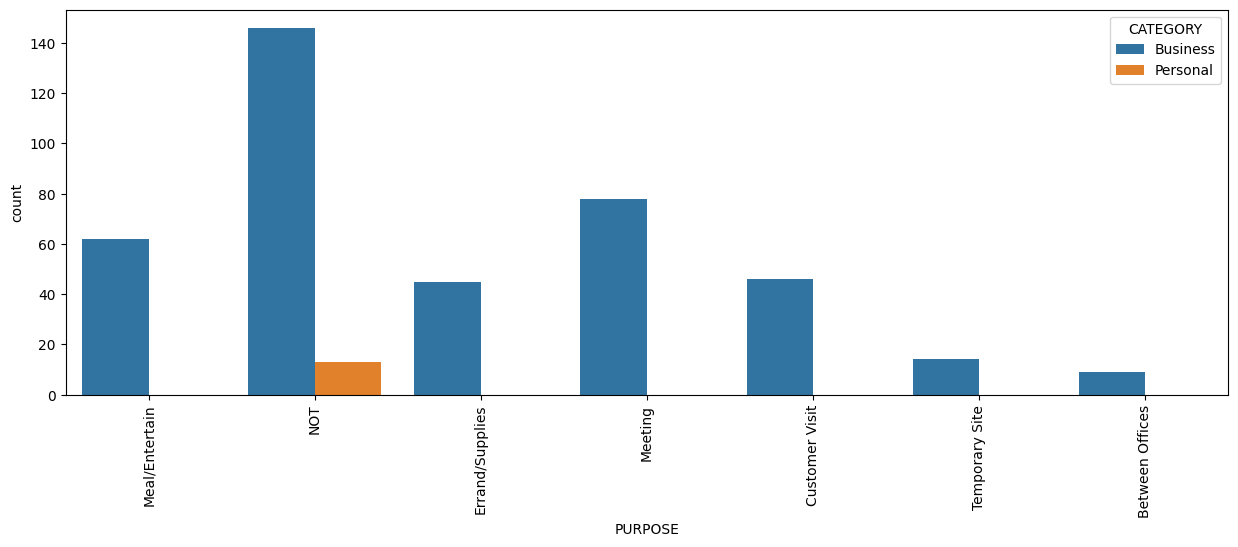

In [65]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()


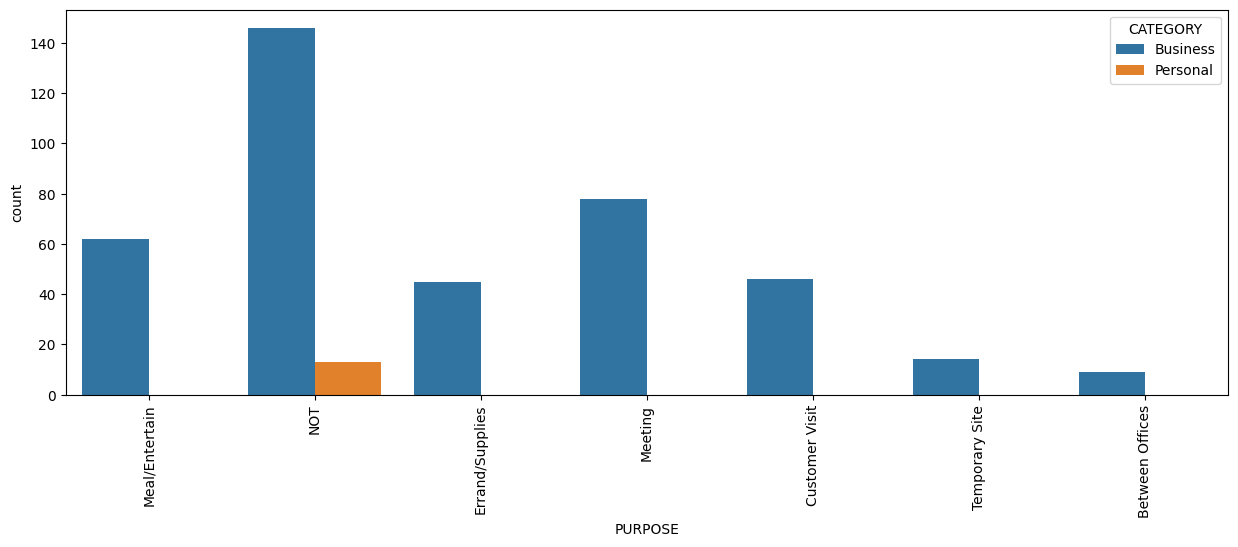

In [66]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()


**Insights from the above count plots:**

- Most of the rides are booked for business purposes.
- A significant number of people book cabs for meetings and entertainment (meals).
- Most cabs are booked between 10 AM and 5 PM (Afternoon).

Given the importance of the CATEGORY and PURPOSE columns, we will now use OneHotEncoder to categorize them.


In [67]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns to be one-hot encoded
object_cols = ['CATEGORY', 'PURPOSE']

# Initialize the OneHotEncoder
OH_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical columns
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))

# Set the index and column names to match the original dataset
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(input_features=object_cols)

# Drop the original categorical columns from the dataset
df_final = dataset.drop(object_cols, axis=1)

# Concatenate the original dataset with the one-hot encoded columns
dataset = pd.concat([df_final, OH_cols], axis=1)


After that, we can now find the correlation between the columns using heatmap.

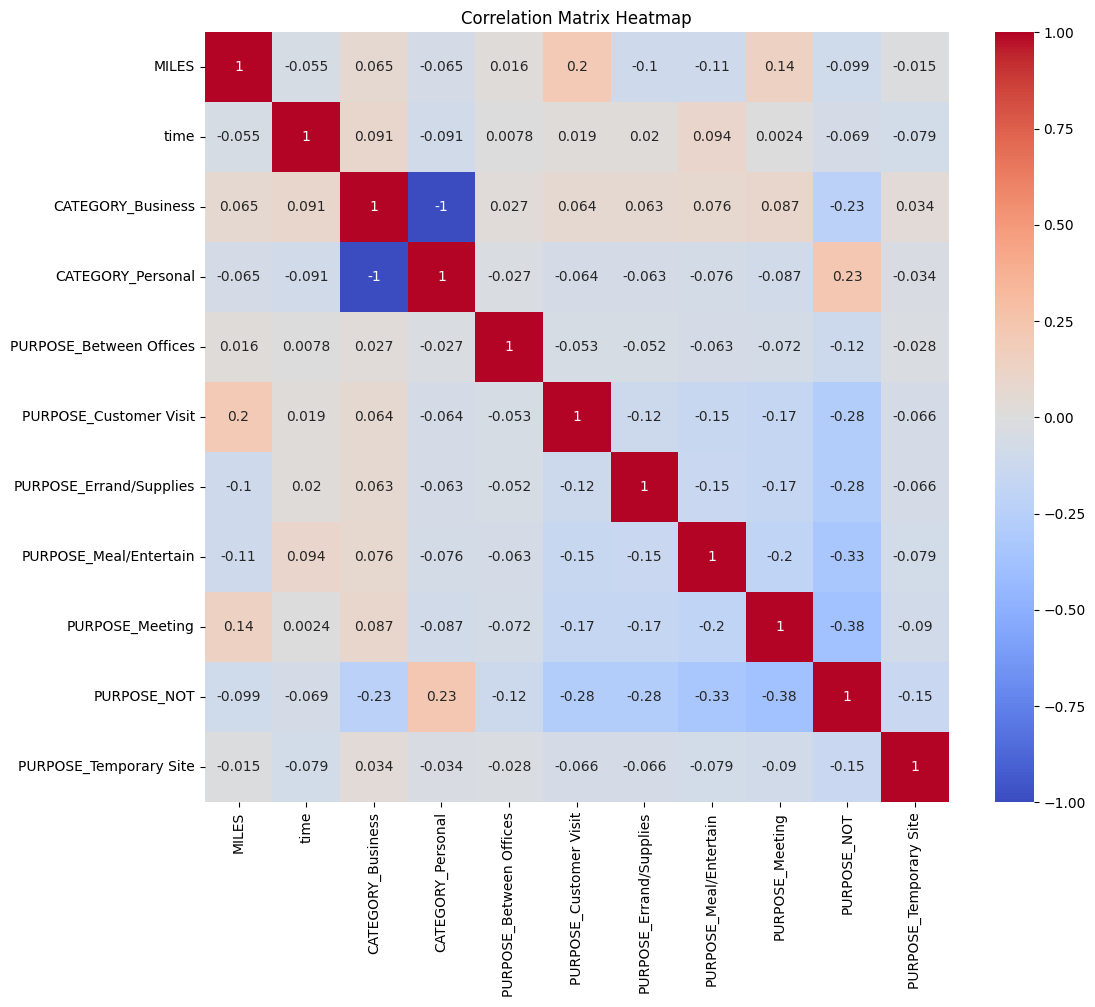

In [68]:
# Exclude non-numeric columns from the dataset
numeric_dataset = dataset.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


**Insights from the heatmap:**

- The Business and Personal categories exhibit a high negative correlation, which supports the earlier observations. This heatmap validates the previously drawn conclusions.
- There is minimal correlation observed between the features.
  
Now, we will visualize the month data, using a similar approach as used for hours earlier.


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

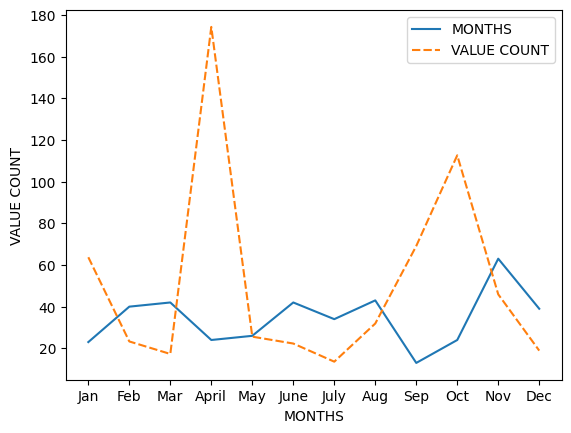

In [69]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
			5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
			9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
				"VALUE COUNT": dataset.groupby('MONTH',
												sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")


**Insights from the above plot:**

- The counts show irregular patterns.
- Despite the irregularities, it's evident that the counts are significantly lower during November, December, and January, which aligns with the winter months in Florida, US.

Next, we'll visualize the data for days in a similar manner.


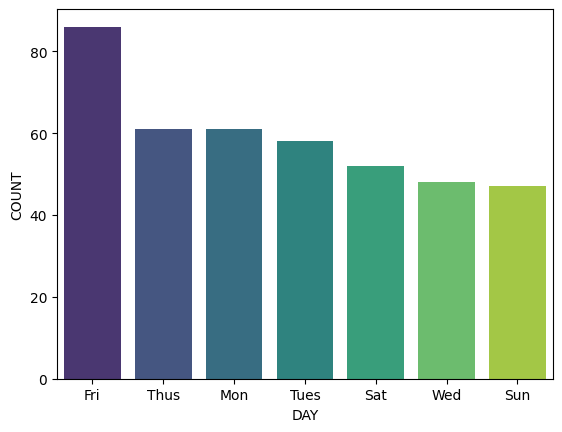

In [74]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
	0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label, hue=day_label.index, palette='viridis', legend=False)
plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.show()



Now, let's explore the MILES column.

We can use a boxplot to examine the distribution of the column.


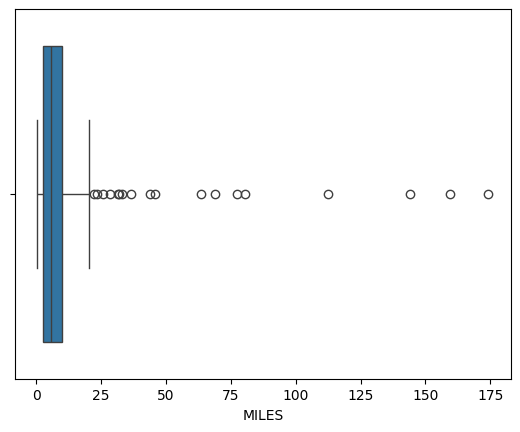

In [71]:
sns.boxplot(x=dataset['MILES'])
plt.xlabel('MILES')
plt.show()



As the graph is not clearly understandable. Let’s zoom in it for values lees than 100

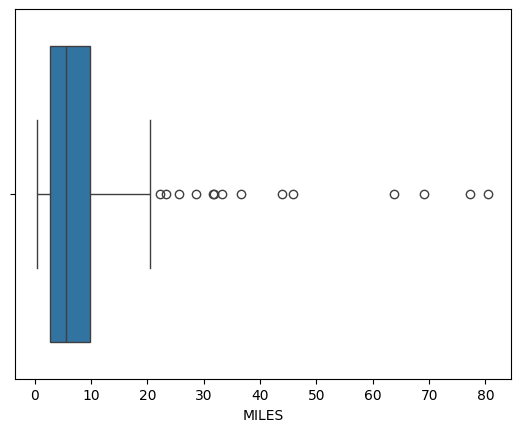

In [72]:
sns.boxplot(x=dataset[dataset['MILES'] < 100]['MILES'])
plt.xlabel('MILES')
plt.show()


For enhanced clarity, we can utilize a distplot specifically for values less than 40 in the dataset.







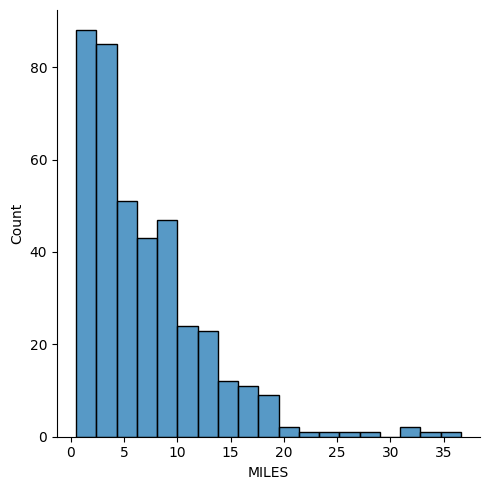

In [75]:
sns.displot(dataset[dataset['MILES']<40]['MILES'])


**Insights from the above plots:**

- The majority of cabs are booked for distances ranging from 4 to 5 miles.
- Most people opt for cabs for distances between 0 and 20 miles.
- There are very few cab bookings for distances exceeding 20 miles.
